# Bank Customer Churn Prediction Using Machine Learning

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Churn_modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

In [6]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 10000
Number of Columns 14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Check Null Values In The Dataset

In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Get Overall Statistics About The Dataset

In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# Dropping Irrelevant Features

In [11]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding Categorical values

In [14]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
data = pd.get_dummies(data,drop_first=True).astype(int)

In [17]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


# Not handling Imbalanced

In [18]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [19]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

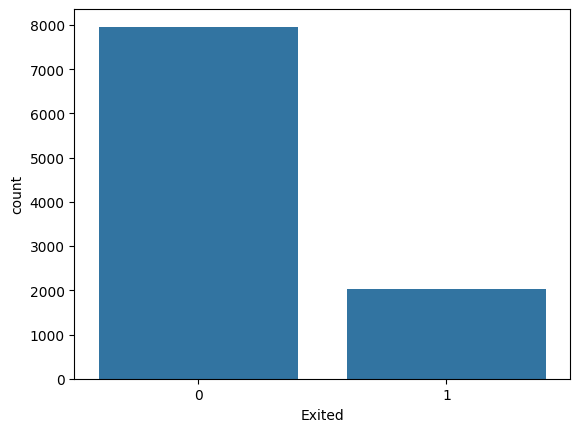

In [20]:
sns.countplot(x='Exited', data=data)

In [21]:
X = data.drop('Exited', axis=1)
y = data['Exited']

# Handling Imbalanced Data With SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [24]:
X_res.value_counts()

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male
777          54   3       0        1              0          0               13299            0                  0                0              2
477          32   5       0        1              1          0               146231           0                  0                0              2
632          43   2       0        1              0          0               125995           0                  1                0              2
536          32   7       0        1              0          1               183037           0                  0                0              2
727          36   8       0        1              0          0               188693           0                  0                1              2
                                                                                                                           

In [25]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

# Splitting The Dataset Into The Training Set And Test Set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[-0.83684321,  0.10543438, -1.39792746, ..., -0.57203285,
        -0.46025316, -0.84279101],
       [ 1.0867623 ,  0.10543438, -1.39792746, ..., -0.57203285,
        -0.46025316,  1.18653378],
       [-2.35833909,  0.30608179,  1.17295374, ..., -0.57203285,
        -0.46025316,  1.18653378],
       ...,
       [ 0.19560043,  0.20575809,  1.17295374, ..., -0.57203285,
        -0.46025316,  1.18653378],
       [-0.912918  , -0.39618413, -0.29612123, ..., -0.57203285,
        -0.46025316, -0.84279101],
       [ 0.52163526,  1.00834771, -1.39792746, ...,  1.74815134,
        -0.46025316,  1.18653378]])

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log = LogisticRegression()

In [34]:
log.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred = log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
accuracy_score(y_test,y_pred)

0.7827997489014438

In [38]:
accuracy_score(y_test,y_pred)

0.7827997489014438

In [39]:
precision_score(y_test,y_pred)

0.7712665406427222

In [40]:
precision_score(y_test,y_pred)

0.7712665406427222

In [41]:
recall_score(y_test,y_pred)

0.7881519639407598

In [42]:
recall_score(y_test,y_pred)

0.7881519639407598

In [43]:
f1_score(y_test,y_pred)

0.7796178343949045

In [44]:
f1_score(y_test,y_pred)

0.7796178343949045

# Support Vector Classifier

In [45]:
from sklearn import svm

In [46]:
svm =svm.SVC()

In [47]:
svm.fit(X_train,y_train)

SVC()

In [48]:
y_pred2 = svm.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred2)

0.8367859384808537

In [50]:
precision_score(y_test,y_pred2)

0.831727681438664

In [51]:
recall_score(y_test,y_pred2)

0.8338699291693497

In [52]:
f1_score(y_test,y_pred2)

0.8327974276527331

# KNeighbors Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
y_pred3 = knn.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred3)

0.8179535467671061

In [58]:
precision_score(y_test, y_pred3)

0.8012383900928792

# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt = DecisionTreeClassifier()

In [61]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
y_pred4 = dt.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred4)

0.7944130571249215

In [64]:
precision_score(y_test, y_pred4)

0.7744498777506112

# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
y_pred5 = rf.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred5)

0.8593848085373509

In [70]:
precision_score(y_test, y_pred5)

0.853486884197057

# Gradient Boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc = GradientBoostingClassifier()

In [73]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [74]:
y_pred6 = gbc.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred6)

0.8377275580665411

In [76]:
precision_score(y_test, y_pred6)

0.8398950131233596

In [77]:
final_data = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN','DT', 'RF', 'GBC'], 'ACC': [accuracy_score(y_test,y_pred),
                                                                                    accuracy_score(y_test,y_pred2),
                                                                                    accuracy_score(y_test,y_pred3),
                                                                                    accuracy_score(y_test,y_pred4),
                                                                                    accuracy_score(y_test,y_pred5),
                                                                                    accuracy_score(y_test,y_pred6),]})

In [78]:
final_data

,Models,ACC
0,LR,0.782800
1,SVC,0.836786
2,KNN,0.817954
3,DT,0.794413
4,RF,0.859385
5,GBC,0.837728


In [79]:
final_data = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN','DT', 'RF', 'GBC'], 'PRE': [precision_score(y_test,y_pred),
                                                                                    precision_score(y_test,y_pred2),
                                                                                    precision_score(y_test,y_pred3),
                                                                                    precision_score(y_test,y_pred4),
                                                                                    precision_score(y_test,y_pred5),
                                                                                    precision_score(y_test,y_pred6),]})

In [80]:
final_data

,Models,PRE
0,LR,0.771267
1,SVC,0.831728
2,KNN,0.801238
3,DT,0.774450
4,RF,0.853487
5,GBC,0.839895


# Save The Model

In [81]:
X_res = sc.fit_transform(X_res)

In [82]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [83]:
import joblib 

In [84]:
joblib.dump(rf, 'churn_predict_model')

['churn_predict_model']

In [85]:
model = joblib.load('churn_predict_model')

In [86]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [87]:
model.predict([[619,42,2,0.0,0,0,0,101348,0,0,0]])

array([1])

# GUI

In [88]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [90]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = float(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = float(e8.get())
    p9 = int(e9.get())
    if p9 == 1:
        Geography_Germany = 1
        Geography_Spain = 0
        Geography_France = 0
    elif p9 == 2:
        Geography_Germany = 0
        Geography_Spain = 1
        Geography_France = 0
    elif p9 == 3:
        Geography_Germany = 0
        Geography_Spain = 0
        Geography_France = 1  
    p10 = int(e10.get())
    model = joblib.load('churn_predict_model')
    result = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7,p8,
                                         Geography_Germany,Geography_Spain,p10]]))
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)

master = Tk()
master.title("Customer Churn Prediction Using Machine Learning")
label = Label(master,text = "Customer Churn Prediction", bg = "black",
                fg = "white").grid(row=0,columnspan=2)
Label(master, text = "CreditScore").grid(row=1)
Label(master, text = "Age").grid(row=2)
Label(master, text = "Tenure").grid(row=3)
Label(master, text = "Balance").grid(row=4)
Label(master, text = "NumofProducts").grid(row=5)
Label(master, text = "HasCrCard").grid(row=6)
Label(master, text = "IsActiveMember").grid(row=7)
Label(master, text = "EstimatedSalary").grid(row=8)
Label(master, text = "Geography").grid(row=9)
Label(master, text = "Gender").grid(row=10)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)

Button(master, text="Predict", command=show_entry_fields).grid()

mainloop()